# **Project 2 Report**

Vincent Ha

CS458

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from sklearn import datasets
from sklearn import tree
import pydotplus
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer

## **P2-1. Decision Tree**

**(a) Develop a decision tree based classifier to classify the 3 different types  of Iris (Setosa, Versicolour, and Virginica).**

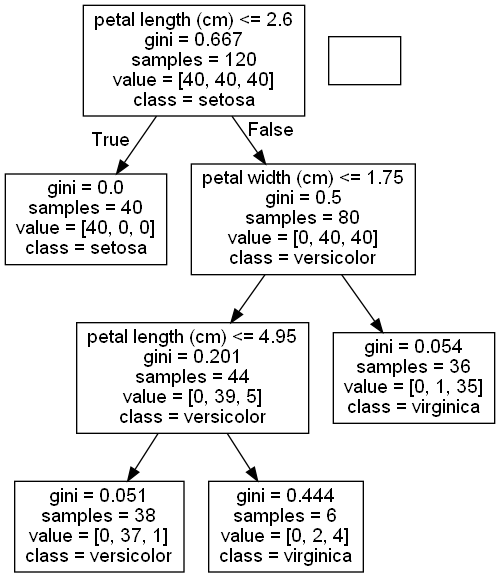

In [3]:
iris = datasets.load_iris()

x,y = iris.data, iris.target

skf = StratifiedKFold(n_splits=5)

for trainIndex, testIndex in skf.split(x,y):
    xTest, xTrain = x[trainIndex], x[testIndex]
    yTest, yTrain = y[trainIndex], y[testIndex]

clf = tree.DecisionTreeClassifier(max_depth=4, max_leaf_nodes=4)
clf = clf.fit(xTest, yTest)


dot_data = tree.export_graphviz(clf, feature_names=iris.feature_names, class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

I use the 5-fold cross validation to split the data into fifths and take one fifth to use for testing and the rest for training. After that, I use the results to create my decision tree and the graphic.

**(b) Optimize the parameters of your decision tree to maximize the classification accuracy. Show the confusion matrix of your decision tree. Plot your decision tree.**

accuracy_score = 0.9666666666666667


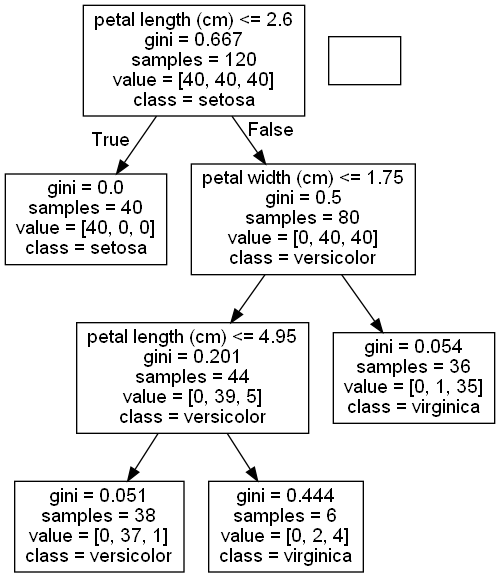

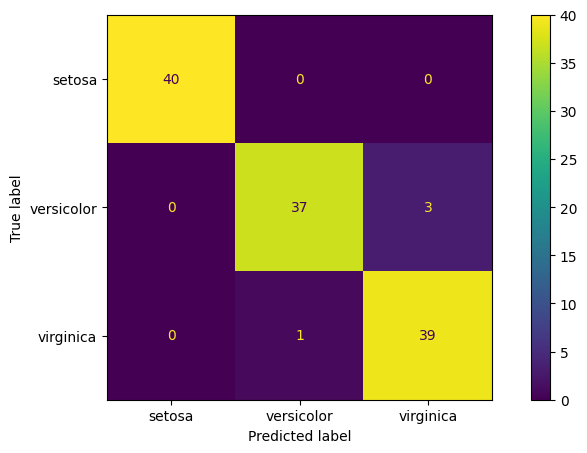

In [4]:
# Codes for P2-1(b)

yPred = clf.predict(xTest)
print("accuracy_score =", accuracy_score(yTest,yPred))

fig, axs = plt.subplots(figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(yTest, yPred, ax=axs)
axs.xaxis.set_ticklabels(iris.target_names)
axs.yaxis.set_ticklabels(iris.target_names)
Image(graph.create_png())

I optimized by testing the accuracy and shifting the max_leaf_nodes and max_depth. I would raise it slightly to see how the accuracy changes and work off of it. I found my best optimization to be around a .96 accuracy.

# **P2-2. Model Overfitting**

**(a) Generate the dataset as in slide 56 in Chapter 3**

Plot your dataset


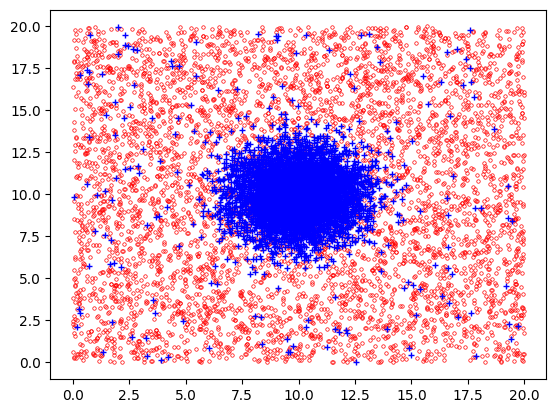

In [57]:
import numpy as np

covariance = [[2,0],[0,2]]

points = np.random.multivariate_normal([10,10], covariance, 5000)
points = np.concatenate((points, 20*np.random.rand(200,2)))
uniform = np.random.uniform(20, 0, (5200,2))

print('Plot your dataset')
plt.plot(uniform[:,0], uniform[:,1], 'r.', fillstyle='none', ms=5, markeredgewidth=.5)
plt.plot(points[:,0], points[:,1], 'b+', ms=5)

**(b) Randomly select 10% of the data as test dataset and the remaining 90% of the data as training dataset. Train decision trees by increasing the number of nodes of the decision trees until the training error becomes 0. Plot the training errors and the testing errors under different numbers of nodes and explain the model underfitting and model overfitting.**

Plot the training errors and the testing errors under different numbers of nodes


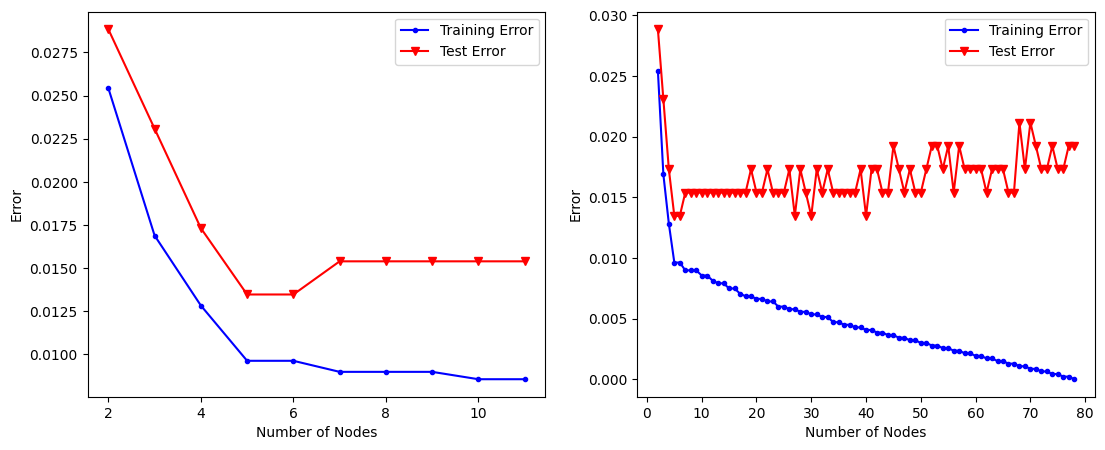

In [110]:
# Codes for P2-2(b)
print('Plot the training errors and the testing errors under different numbers of nodes')

pointsLabel = np.concatenate((np.ones(int(5000)),np.zeros(int(200))))

pointsTest, pointsTrain, labelTest, labelTrain = train_test_split(points, pointsLabel, test_size=0.9)


depth = []
trainError = []
testError = []
test = 0
nodes = 2

while test != 1:
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=nodes)
    clf = clf.fit(pointsTrain, labelTrain)
    trainPred = clf.predict(pointsTrain)
    testPred = clf.predict(pointsTest)

    test = accuracy_score(labelTrain, trainPred)
    trainError.append(1-test)
    testError.append(1-accuracy_score(labelTest, testPred))

    depth.append(nodes)
    nodes+=1



figure, axs = plt.subplots(1,2,figsize=(13,5))
axs[0].plot(depth[:10],trainError[:10],'b.-',depth[:10],testError[:10],'rv-')
axs[1].plot(depth, trainError,'b.-',depth,testError,'rv-')

axs[0].set_xlabel('Number of Nodes')
axs[1].set_xlabel('Number of Nodes')

axs[0].set_ylabel('Error')
axs[1].set_ylabel('Error')

axs[0].legend(['Training Error', 'Test Error'])
axs[1].legend(['Training Error', 'Test Error'])

Explain the model underfitting and model overfitting here.

In the case of underfitting, the model is too simple and the training and test will have large errors. Overfitting is too complex, the training error is small, but there is a large test error.

# **P2-3. Text Documents Classification**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']. Print the number of documents in the training dataset and the test dataset. Print the number of attributes in the training dataset.**

In [124]:
categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']

trainData = fetch_20newsgroups(subset="train",categories=categories)
testData = fetch_20newsgroups(subset="test",categories=categories)

vectorizor= TfidfVectorizer()

vectTrain = vectorizor.fit_transform(trainData.data)
vectTest = vectorizor.transform(testData.data)

print("num of train documents =", len(trainData.data))
print("num of test documents =", len(testData.data))
print("attribtes of documents =", vectTest.shape[1])


num of train documents = 2148
num of test documents = 1430
attribtes of documents = 34948


**(b) Optimize the parameters of your decision tree to maximize the classification accuracy. Show the confusion matrix of your decision tree.**

Print your classification accuracy, confusion matrix.
accuracy score = 0.7657342657342657


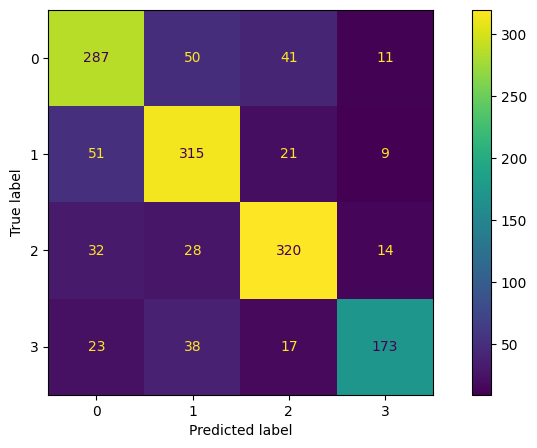

In [162]:
# Codes for P2-3(b)
print('Print your classification accuracy, confusion matrix.')
clf = tree.DecisionTreeClassifier(max_depth= 60, max_leaf_nodes = 60)
clf = clf.fit(vectTrain, trainData.target)
pred = clf.predict(vectTest)

print("accuracy score =", accuracy_score(testData.target,pred))
fig, axs = plt.subplots(figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(testData.target, pred, ax=axs)


Discuss how you optimize the parameters of your decision tree here.

I optimized my paremters through manually checking values of depth and max leaf nodes. I would slowly increase the values for the max_depth and max_leaf_nodes and find the highest accuracy possible. Eventually, I reached a point where my accuracy decreased due to overfitting.